In [1]:
# import external libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load training and test data set
training = pd.read_table('./data/BingHackathonTrainingData.txt', sep='\t', header=None)
test = pd.read_table('./data/BingHackathonTestData.txt', sep='\t', header=None)

training = training[range(0,  6)]
test = test[range(0, 6)]

In [3]:
training = training.rename(columns={0: 'record_id', 1: 'topic_id', 2: 'publication_year', 3: 'authors', 4: 'title', 5: 'summary'})
test = test.rename(columns={0: 'record_id', 1: 'topic_id', 2: 'publication_year', 3: 'authors', 4: 'title', 5: 'summary'})

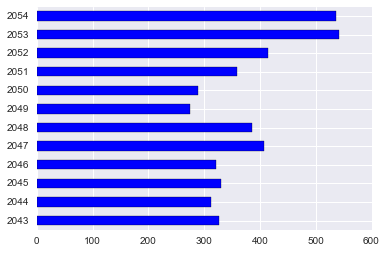

In [4]:
training.publication_year.value_counts().sort_index().plot(kind='barh');

In [5]:
s = training.groupby(['publication_year', 'topic_id']).size()
s = s.unstack(1)

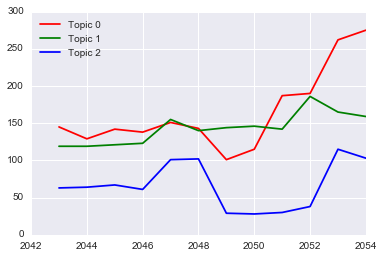

In [6]:
plt.plot(s.index.values, s[0], c='r', label='Topic 0')
plt.plot(s.index.values, s[1], c='g', label='Topic 1')
plt.plot(s.index.values, s[2], c='b', label='Topic 2')

plt.legend(loc='best')
plt.show();

In [7]:
import re

def remove_periods(summary_text):
    return re.sub("[.]", " ", summary_text)
    
summary_train = training.summary.apply(remove_periods)
summary_test = test.summary.apply(remove_periods)

In [8]:
y = training.topic_id

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(summary_train.values, y, test_size=0.2, random_state=44)

In [12]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(3598L,) (900L,) (3598L,) (900L,)


In [13]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_selection import chi2, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [17]:
nb = MultinomialNB(alpha=10)
count_vect = CountVectorizer(ngram_range=(1, 1))
truncated_svd = TruncatedSVD(n_components=250)

# featureSelection = SelectKBest(chi2, k=200)
pipeline_naive_bayes = Pipeline([('count_vect', count_vect),('svd', truncated_svd), ('naive_bayes', nb)])

In [31]:
logistic_regression = LogisticRegression(C=0.01)
count_vect = CountVectorizer(ngram_range=(1, 1))
truncated_svd = TruncatedSVD(n_components=250)

pipeline_log_reg = Pipeline([('count_vect', count_vect),('svd', truncated_svd), ('log_reg', logistic_regression)])

In [22]:
# rf = RandomForestClassifier(n_estimators=100)
# featureSelection = SelectKBest(chi2, k=200)

# pipeline_rf = Pipeline([('feature_selction', featureSelection), ('rf', rf)])

In [32]:
# fit these two models

# pipeline_naive_bayes.fit(X_train, y_train)
pipeline_log_reg.fit(X_train, y_train)
# pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('count_vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
    ...',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0))])

In [33]:
# predictions

# predsTrain_NB = pipeline_naive_bayes.predict(X_train.toarray())
predsTrain_LR = pipeline_log_reg.predict(X_train)
# predsTrain_RF = pipeline_rf.predict(X_train)

# predsTest_NB = pipeline_naive_bayes.predict(X_test.toarray())
predsTest_LR = pipeline_log_reg.predict(X_test)
# predsTest_RF = pipeline_rf.predict(X_test)

In [34]:
# print 'Accuracy on the training examples for Naive Bayes %f ' %(accuracy_score(y_train, predsTrain_NB))
# print 'Accuracy on the test examples for Naive Bayes %f ' %(accuracy_score(y_test, predsTest_NB))

# print '\n\n'
print 'Accuracy on the training examples for Logistic Regression %f ' %(accuracy_score(y_train, predsTrain_LR))
print 'Accuracy on the test examples for Logistic Regression %f ' %(accuracy_score(y_test, predsTest_LR))

# print '\n\n'
# print 'Accuracy on the training examples for Random Forest Classifier %f ' %(accuracy_score(y_train, predsTrain_RF))
# print 'Accuracy on the test examples for Random Forest Classifier %f ' %(accuracy_score(y_test, predsTest_RF))

Accuracy on the training examples for Logistic Regression 0.689550 
Accuracy on the test examples for Logistic Regression 0.682222 
